In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 13)
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import time

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [7]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [11]:
df_train.mean()

account_length                   100.236235
number_vmail_messages              7.631765
total_day_minutes                180.259600
total_day_calls                   99.907294
total_day_charge                  30.644682
total_eve_minutes                200.173906
total_eve_calls                  100.176471
total_eve_charge                  17.015012
total_night_minutes              200.527882
total_night_calls                 99.839529
total_night_charge                 9.023892
total_intl_minutes                10.256071
total_intl_calls                   4.426353
total_intl_charge                  2.769654
number_customer_service_calls      1.559059
dtype: float64

In [10]:
df_train.std()

account_length                   39.698401
number_vmail_messages            13.439882
total_day_minutes                54.012373
total_day_calls                  19.850817
total_day_charge                  9.182096
total_eve_minutes                50.249518
total_eve_calls                  19.908591
total_eve_charge                  4.271212
total_night_minutes              50.353548
total_night_calls                20.093220
total_night_charge                2.265922
total_intl_minutes                2.760102
total_intl_calls                  2.463069
total_intl_charge                 0.745204
number_customer_service_calls     1.311434
dtype: float64

In [20]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [25]:
df_train_std_num = df_train.select_dtypes(include=np.number)
df_train_std_non_num = df_train.select_dtypes(exclude=np.number)

df_train_std_num = (df_train_std_num - df_train_std_num.mean()) / (df_train_std_num.std()) 
df_train_std = pd.concat([df_train_std_num, df_train_std_non_num], axis = 1)
df_train_std.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03
mean,-2.305345e-17,2.630575e-16,1.093794e-14,1.588141e-16,-1.447010e-14,-2.518717e-15,2.044443e-16,1.737956e-15,-9.359023e-15,2.542615e-16,-1.770696e-14,8.967467e-16,5.015596e-18,1.785983e-14,4.532322e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.499754e+00,-5.678446e-01,-3.337376e+00,-5.032906e+00,-3.337439e+00,-3.983599e+00,-5.031821e+00,-3.983650e+00,-3.982398e+00,-4.968817e+00,-3.982437e+00,-3.715831e+00,-1.797088e+00,-3.716638e+00,-1.188820e+00
25%,-6.860789e-01,-5.678446e-01,-6.838174e-01,-6.502147e-01,-6.839051e-01,-6.815768e-01,-6.618485e-01,-6.818935e-01,-6.613810e-01,-6.887661e-01,-6.625965e-01,-6.362340e-01,-5.790958e-01,-6.302355e-01,-4.262960e-01
50%,-5.950751e-03,-5.678446e-01,3.525118e-03,4.670129e-03,3.846360e-03,1.046964e-02,-8.864042e-03,1.053290e-02,-1.546710e-03,7.986305e-03,-1.717519e-03,1.591587e-02,-1.730982e-01,1.388329e-02,-4.262960e-01
75%,6.741774e-01,6.226420e-01,6.654105e-01,6.595550e-01,6.649155e-01,6.686849e-01,6.943500e-01,6.678405e-01,6.786437e-01,6.549707e-01,6.779176e-01,6.318352e-01,6.388968e-01,6.311638e-01,3.362284e-01
max,3.596209e+00,3.301237e+00,3.170392e+00,3.279095e+00,3.170879e+00,3.166719e+00,3.507206e+00,3.166546e+00,3.862133e+00,3.740589e+00,3.859846e+00,3.530279e+00,6.322862e+00,3.529698e+00,5.673899e+00


In [26]:
df_train_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   float64
 1   number_vmail_messages          4250 non-null   float64
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   float64
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   float64
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   float64
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   f

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

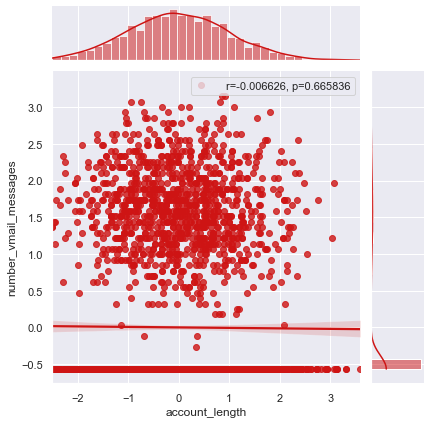

In [16]:

graph = sns.jointplot(df_train_std.loc[:,'account_length'], df_train_std.loc[:,'number_vmail_messages'], kind="reg", color="#ce1414")
r, p = stats.pearsonr(df_train_std.loc[:,'account_length'], df_train_std.loc[:,'number_vmail_messages'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
